#DSCI 619: Deep Learning
## Project 4
Symphony Hopkins

##Introduction

For this project, our objective is to build an optimal convolutional neural network to classify handwritten digits. We will use a built-in dataset, MNIST, provided by TensorFlow. The dataset contains 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 

Source: [MNIST Digits Classification Dataset](https://keras.io/api/datasets/mnist/#:~:text=tf.keras.datasets.mnist.load_data%28path%3D%22mnist.npz%22%29%20Loads%20the%20MNIST%20dataset.%20This%20is%20a,along%20with%20a%20test%20set%20of%2010%2C000%20images.)

## Data Preparation

**1.Load the data using the following codes:**



Let's begin by loading the MNIST dataset into memory.

In [1]:
#importing libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
#loading the MNIST digits classification dataset from Tensorflow Keras
mnist = tf.keras.datasets.mnist
#splitting data into training and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#we are dividing the values by 255.0 to normalize the pixels so that they are within the range of 0 and 1, and to convert the values to floats
x_train, x_test = x_train / 255.0, x_test / 255.0

It's always good to check the data types, so let's see what they are for each variable.

In [3]:
#checking data type of each variable
print(f'''
x_train data type: {x_train.dtype}
y_train data type: {y_train.dtype}
x_test data type:  {x_test.dtype}
y_test data type:  {y_test.dtype}
''')


x_train data type: float64
y_train data type: uint8
x_test data type:  float64
y_test data type:  uint8



When we divided the *x_train* and *x_test* by 255.0 earlier, it converted the data types from uint8 to float64. Now, let's look at the shape of the data.

In [4]:
#checking shape of data
print(f'''
x_train shape: {x_train.shape}
y_train shape: {y_train.shape}
x_test shape:  {x_test.shape}
y_test shape:  {y_test.shape}
''')


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)



As we can see, there are 60000 images in the train set and 10000 images in the test set, both of which are 28x28. We can also see that the x_train and x_test sets are 3D arrays; however, Keras Convolution 2D Layers only accept 4D arrays. To fix this issue, we must reshape the data. We will do so by adding the channel dimension.



In [5]:
#reshaping the data
#each image is 28x28, so we will set the height and width to be those values
height, width = x_train.shape[1:]
x_train = x_train.reshape(x_train.shape[0], height, width, 1)
x_test = x_test.reshape(x_test.shape[0], height, width, 1)

In [6]:
#checking new shape of data
print(f'''
x_train shape: {x_train.shape}
x_test shape:  {x_test.shape}
''')


x_train shape: (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)



 Next, let's look at the labels.

In [7]:
#checking labels
import numpy as np
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

We have ten labels for the digits, ranging from 0 to 9. Now, let's look at the pixel values. Pixel values fall within the range of 0 (black) and 255 (white); since we normalized these values earlier by dividing them by 255.0, they should fall within the range of 0 and 1.

In [8]:
#checking pixel value range
import numpy as np
print(f'The minimum value of pixels = {np.amin(x_train[0])}; the maximum value of pixels ={np.amax(x_train[0])}' )

The minimum value of pixels = 0.0; the maximum value of pixels =1.0


Finally, let's visualize the first image to get an idea of the digits look like.

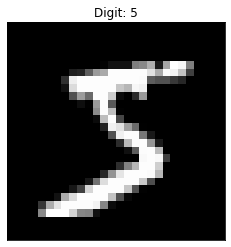

In [9]:
#visualizing an image
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title(f'Digit: {y_train[0]}')
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)

##Building Convolutional Neural Networks

**2.Build the first model try different type of convolution and maxpooling layers.**

Now, let's create a convolution neural network to classify the digits. 

In [10]:
#creating first model
model = models.Sequential()

#adding first convolution layer
#since we reshaped the x_train set to be (60000,28,28,1), we can simply set the input_shape to be x_train[1:] so that it'll be (28,28,1)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape= x_train.shape[1:]))

#adding the first max pooling layer; pooling window will be 2x2
model.add(layers.MaxPooling2D((2, 2)))

#adding second convolution layer; increasing # of filters from 32 to 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#adding second max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

#adding third convolution layer; increasing # of filters from 64 to 128
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

#adding third max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

#we need to change the dimensions of the output array to 2D to make it work with the classification algorithm, so we will add a flatten layer
model.add(layers.Flatten())

#adding layers for classification; layer will contain 128 neurons
model.add(layers.Dense(128, activation='relu'))

#adding dropout layer 
model.add(layers.Dropout(0.3))

#since we have 10 labels, we need to have 10 neurons for the final output later; activation=None
model.add(layers.Dense(10))

#configuring model; since activation=None, from_logits must =True
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


**3.Print out the size of each layer of the model in step 2 using model summary function. What's the test error?**

Let's see the different sizes for each layer from the model we created.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

As we can see, the dimension sizes decreased as we added different layers. Let's evaluate the model by looking at the test error. To begin, we will train the model. We will implement early stopping while training the model since we have 110,474 paramaters. The training will stop if the validation accuracy does not improve for 3 epochs.

In [12]:
%%time
#adding early stopping; if the validation accuracy does not improve for 3 epochs, we will stop training
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 3)

#training the model and storing the history in a variable to plot later
#we will make the number of epochs short since training models for image classification can run for a long time
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[callback], verbose = 1)

Epoch 1/20
1875/1875 [==============================] - 86s 44ms/step - loss: 0.2193 - accuracy: 0.9321 - val_loss: 0.0678 - val_accuracy: 0.9797
Epoch 2/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0767 - accuracy: 0.9773 - val_loss: 0.0558 - val_accuracy: 0.9832
Epoch 3/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0535 - accuracy: 0.9839 - val_loss: 0.0573 - val_accuracy: 0.9832
Epoch 4/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0421 - accuracy: 0.9876 - val_loss: 0.0445 - val_accuracy: 0.9863
Epoch 5/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.0477 - val_accuracy: 0.9860
Epoch 6/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0437 - val_accuracy: 0.9874
Epoch 7/20
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.0460 -

Next, we will create a line plot to visualize the model history.

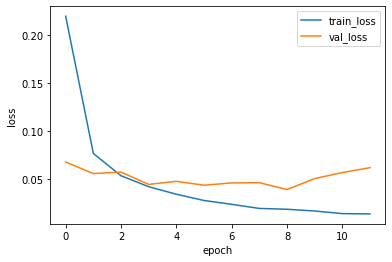

In [13]:
#importing libraries
import seaborn as sns
import pandas as pd

#visualizing training history
train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
#plotting training loss line plot
sns.lineplot(x='epoch', y ='loss', data =train_history)
#plotting validation loss line plot
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
#adding legends
plt.legend(labels=['train_loss', 'val_loss'])
#displaying line plot
plt.show()


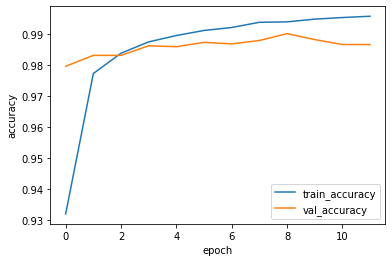

In [14]:
#plotting training accuracy
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
#plotting validation accuracy
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
#adding legends
plt.legend(labels=['train_accuracy', 'val_accuracy'])
#displaying line plot
plt.show()

As we can see, early stopping was implemented at 12 epochs. For the loss plot, we observed the training loss sharply decreased after the first few epochs, and continued to decrease as the number of epochs increased; for the validation loss, there was instability as it increased and decreased as the number of epoched increased. For the accuracy plot, we observed the training and validation accuracies approach high numbers, with training accuracy steadily approaching 100% and validation accuracy fluctuating. From these plots, we suspect that the model is over-fitting. Let's calculate the overall test error and accuracy to evaluate the model's performance. 

In [15]:
#calculating test error and accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'''
Test Loss: {round(test_loss, 4)}
Test Accuracy: {round(test_acc, 4)}''')


Test Loss: 0.0619
Test Accuracy: 0.9867


We have a really low test loss and high test accuracy, which means the model is performing very well. However, we do suspect that there is some over-fitting because the accuracies are really high.

**4.Build a second model using different type of convolution and maxpooling layer. What's the test error?**

Let's create a new model with different arrangements of the convolution and maxpooling layers to see if we can achieve better results. Since our first model seems to be over-fitting, let's see if adding more drop-out layers and reducing the number of neurons in the hidden layers will stop this issue.

In [16]:
#creating second model
model = models.Sequential()

#adding first convolution layer
#since we reshaped the x_train set to be (60000,28,28,1), we can simply set the input_shape to be x_train[1:] so that it'll be (28,28,1)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape= x_train.shape[1:]))

#adding the first max pooling layer; pooling window will be 2x2
model.add(layers.MaxPooling2D((2, 2)))

#adding second convolution layer; increasing # of filters from 32 to 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#adding second max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

#adding third convolution layer; increasing # of filters from 64 to 128
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

#adding third max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

#we need to change the dimensions of the output array to 2D to make it work with the classification algorithm, so we will add a flatten layer
model.add(layers.Flatten())

#adding first layer for classification; layer will contain 128 neurons
model.add(layers.Dense(128, activation='relu'))

#adding first dropout layer
model.add(layers.Dropout(0.3))

#adding second layer for classification; layer will contain 64 neurons
model.add(layers.Dense(64, activation='relu'))

#adding second dropout layer
model.add(layers.Dropout(0.3))

#adding third layer for classification; layer will contain 64 neurons
model.add(layers.Dense(32, activation='relu'))

#adding third dropout layer
model.add(layers.Dropout(0.3))

#since we have 10 labels, we need to have 10 neurons for the final output later; activation=None
model.add(layers.Dense(10))

#configuring model; since activation=None, from_logits must =True
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

**5.Print out the size of each layer of the model in step 4 using model summary function. What's the test error?**


Let's see the different sizes for each layer from the model we created.

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 128)       

We have slighly more paramaters to evaluate; so similar to before, we will train the model for 20 epochs since we have a large amount parameters. If the model does not improve for 3 epochs, we will stop the training. Then, we will look at the model's history.

In [18]:
%%time
#adding early stopping; if the validation accuracy does not improve for 3 epochs, we will stop training
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 3)

#training the model and storing the history in a variable to plot later
#we will make the number of epochs short since training models for image classification can run for a long time
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[callback], verbose = 1)

Epoch 1/20
1875/1875 [==============================] - 79s 41ms/step - loss: 0.4351 - accuracy: 0.8680 - val_loss: 0.1034 - val_accuracy: 0.9721
Epoch 2/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1347 - accuracy: 0.9690 - val_loss: 0.0802 - val_accuracy: 0.9797
Epoch 3/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0993 - accuracy: 0.9778 - val_loss: 0.0650 - val_accuracy: 0.9860
Epoch 4/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0808 - accuracy: 0.9816 - val_loss: 0.0675 - val_accuracy: 0.9859
Epoch 5/20
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0687 - accuracy: 0.9839 - val_loss: 0.0633 - val_accuracy: 0.9863
Epoch 6/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0578 - accuracy: 0.9863 - val_loss: 0.0766 - val_accuracy: 0.9863
Epoch 7/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0528 - accuracy: 0.9875 - val_loss: 0.0608 -

The model concluded at training at 12 epochs. So, let's visualize the model's history with line plots.

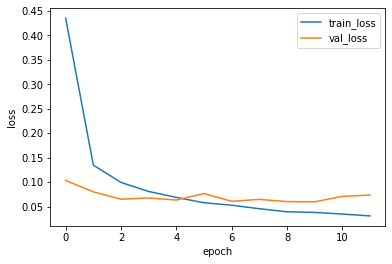

In [19]:
#visualizing training history
train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
#plotting training loss line plot
sns.lineplot(x='epoch', y ='loss', data =train_history)
#plotting validation loss line plot
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
#adding legends
plt.legend(labels=['train_loss', 'val_loss'])
#displaying line plot
plt.show()

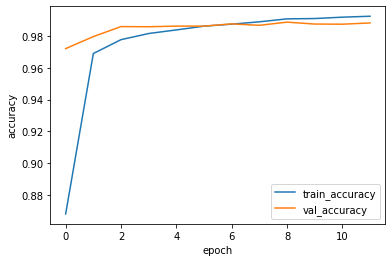

In [20]:
#plotting training accuracy
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
#plotting validation accuracy
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
#adding legends
plt.legend(labels=['train_accuracy', 'val_accuracy'])
#displaying line plot
plt.show()

Looking at the loss and accuracy plots, we can see that the model is performing similarly to the previous model. Let's calculate the model's overall test error and accuracy.

In [21]:
#calculating test error and accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'''
Test Loss: {round(test_loss, 4)}
Test Accuracy: {round(test_acc, 4)}''')


Test Loss: 0.0736
Test Accuracy: 0.9883


As seen before, we have a really a low test loss and high test accuracy, which does raise suspicion since this model is nearly 99% accuracy (this rarely happens).

##Conclusion

**6. Please recommend the best model.**

Both models could be improved upon with parameter tuning, but of the two we created, we recommend the first model as the best model for MNIST digit classification because it had a slightly better test error and test accuracy. However, it is important to note that the model may be over-fitting the data as we can see with its high accuracy score (nearing 100%, which is rare for models to achieve). 